In [286]:
from setup import DatabaseWrapper
import numpy as np
import matplotlib.pyplot as plt
from test import TestData
t = TestData()
t.test_excel_data()

In [287]:
table_name = 'tickerdata'
db = DatabaseWrapper(table_name)

dataframe = None

if not db.check_if_table_exists():
    db.load_data_from_xls('./data.xlsx')

dataframe = db.get_data_aspd()
# dataframe.set_index('date', inplace=True)
dataframe.head()

postgres postgres ticker_db localhost 5432
Connected to DATABASE: ticker_db


/home/akshat/cmpny/src/setup.py:97: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,date,close,high,low,open,volume,instrument
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO


In [288]:
fast_time = 50
slow_time = 100
dataframe['slow_sma'] = dataframe['close'].rolling(slow_time).mean()
dataframe['fast_sma'] = dataframe['close'].rolling(fast_time).mean()
dataframe['prev_fast_sma'] = dataframe['fast_sma'].shift(1)
dataframe.dropna(inplace=True)


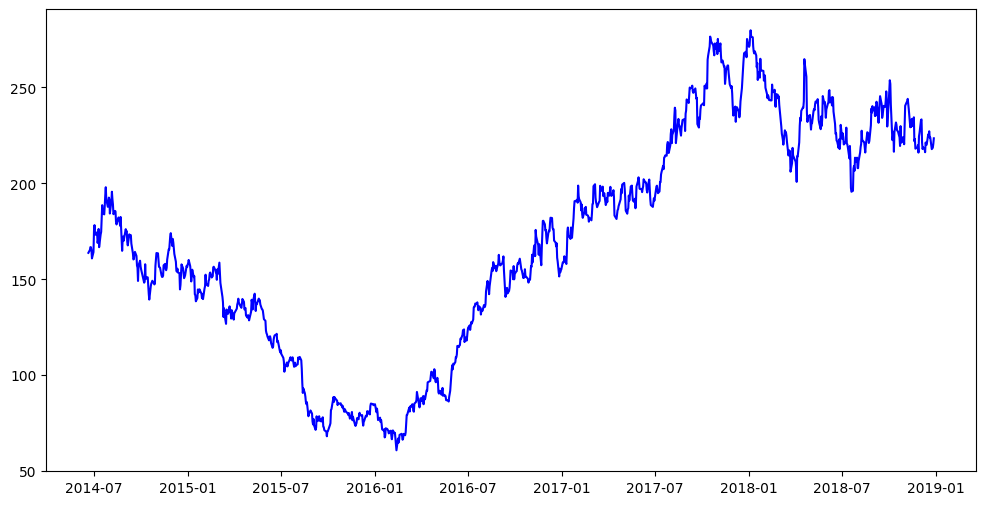

In [289]:
plt.figure(figsize=(12, 6))
plt.plot(dataframe.date, dataframe['close'], label='Close Price', color='blue')
plt.show()

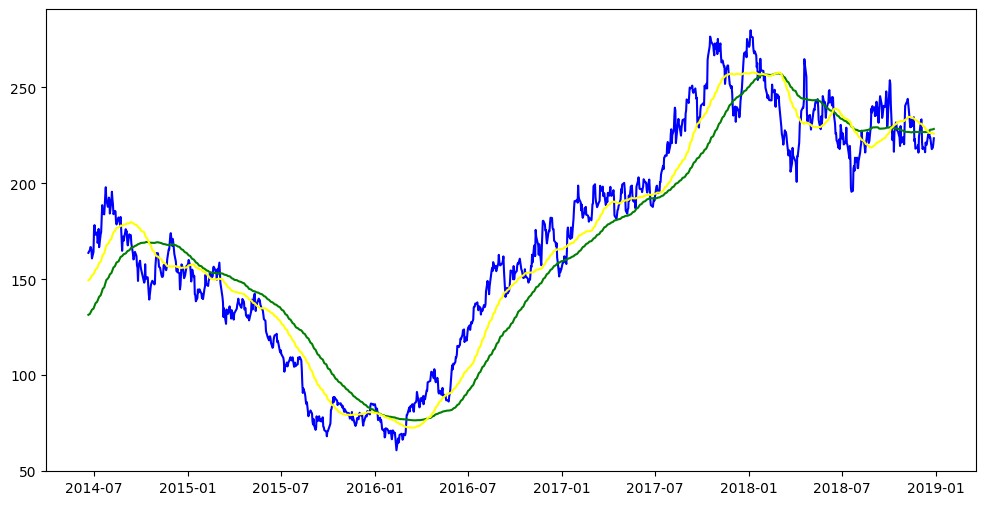

In [290]:
plt.figure(figsize=(12, 6))
plt.plot(dataframe.date, dataframe['close'], label='Close Price', color='blue')
plt.plot(dataframe.date, dataframe['slow_sma'], label='Slow SMA', color='green')
plt.plot(dataframe.date, dataframe['fast_sma'], label='Fast SMA', color='yellow')
plt.show()

In [291]:
dataframe['signal'] = np.where(dataframe['fast_sma'] > dataframe['slow_sma'], 1, 0)
dataframe['position'] = dataframe['signal'].diff()
dataframe['buy'] = np.where(dataframe['position'] == 1, dataframe['close'], np.NaN)
dataframe['sell'] = np.where(dataframe['position'] == -1, dataframe['close'], np.NaN)

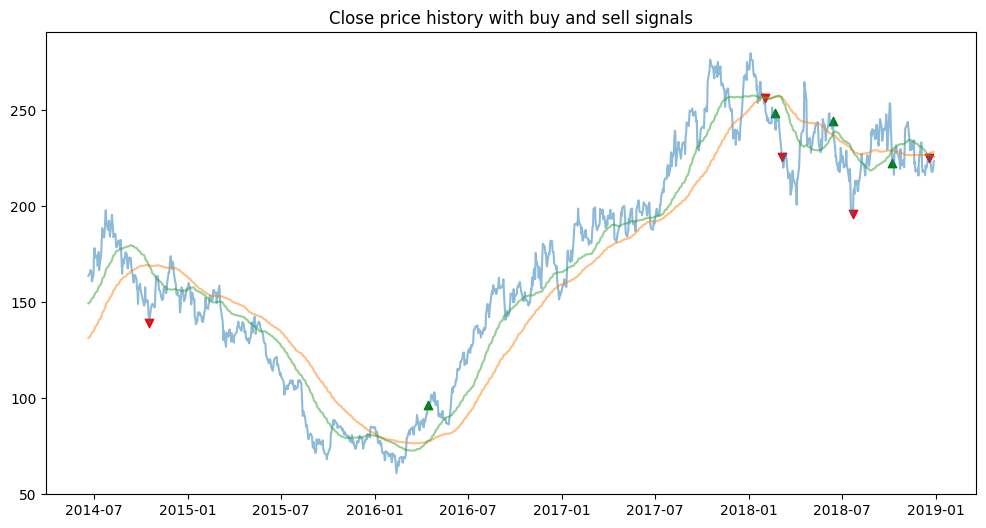

In [292]:
plt.figure(figsize=(12, 6))
plt.title('Close price history with buy and sell signals')
plt.plot(dataframe.date, dataframe['close'], label='Close Price', alpha=0.5)
plt.plot(dataframe.date, dataframe['slow_sma'], label='Slow SMA', alpha=0.5)
plt.plot(dataframe.date, dataframe['fast_sma'], label='Fast SMA', alpha=0.5)
plt.scatter(dataframe.date, dataframe['buy'], alpha=1, label="Buy", marker="^", color="green")
plt.scatter(dataframe.date, dataframe['sell'], alpha=1, label="Close", marker="v", color="red")
plt.show()

In [293]:
# Although 50 is not a good choice for Fast SMA, the strategy above allows
# for maxium profit between first half 2016 to first half of 2018 from an investoment point of view
# With other strategies like 20 v/s 100 this peak was being missed  
# other adjustments can be used to generate more profit